# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
#folder shortcut
path = r'C:\Users\cook family\Desktop\Citi_Bike'

In [4]:
citibike = pd.read_csv(os.path.join(path, '02 Data' , 'prepared data' , 'citibike_3.csv'), index_col = False)

In [5]:
station =pd.read_csv(os.path.join(path, '02 Data','prepared data', 'bike_station.csv'), index_col = False)

In [6]:
station.head()

,Unnamed: 0,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides
0,0,72,40.767272,-73.993929,5.642857
1,1,79,40.719116,-74.006667,4.357143
2,2,82,40.711174,-74.000165,2.185185
3,3,83,40.683826,-73.976323,2.571429
4,4,116,40.741776,-74.001497,8.966667


In [7]:
columns_to_drop_1=['unnamed: 0']

In [8]:
station

,Unnamed: 0,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides
0,0,72,40.767272,-73.993929,5.642857
1,1,79,40.719116,-74.006667,4.357143
2,2,82,40.711174,-74.000165,2.185185
3,3,83,40.683826,-73.976323,2.571429
4,4,116,40.741776,-74.001497,8.966667
...,...,...,...,...,...
325,325,2017,40.750224,-73.971214,3.000000
326,326,2021,40.759291,-73.988597,5.357143
327,327,2022,40.758491,-73.959206,3.310345
328,328,2023,40.759681,-73.970314,3.217391


In [9]:
citibike.columns

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0',
       'day_of_the_week', 'start_hour', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_of_ride', 'end_of_ride',
       'trip category', 'ride_start_date', 'ride_start_time'],
      dtype='object')

In [10]:
#Remove unnamed columns
citibike_1=citibike[['day_of_the_week','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_of_ride', 'end_of_ride',
       'trip category', 'ride_start_date', 'ride_start_time']]

In [11]:
citibike_1

,day_of_the_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride,trip category,ride_start_date,ride_start_time
0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:00,2013-09-09 18:35:00,10-20 minutes,2013-09-09,18:35:00
1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:00,2013-09-12 18:48:00,under 10 minutes,2013-09-12,18:48:00
2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:00,2013-09-18 19:50:00,under 10 minutes,2013-09-18,19:50:00
3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:00,2013-09-28 12:03:00,under 10 minutes,2013-09-28,12:03:00
4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:00,2013-09-27 22:08:00,under 10 minutes,2013-09-27,22:08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42988,Sat,15,435,W 21 St & 6 Ave,40.741740,-73.994156,448,W 37 St & 10 Ave,40.756604,-73.997901,975,Subscriber,1973.0,1,2013-09-28 15:30:00,2013-09-28 15:46:00,10-20 minutes,2013-09-28,15:46:00
42989,Sun,16,224,Spruce St & Nassau St,40.711464,-74.005524,301,E 2 St & Avenue B,40.722174,-73.983688,1541,Subscriber,1975.0,1,2013-09-01 16:27:00,2013-09-01 16:52:00,over 20 minutes,2013-09-01,16:52:00
42990,Sat,17,261,Johnson St & Gold St,40.694749,-73.983625,151,Cleveland Pl & Spring St,40.721816,-73.997203,1191,Subscriber,1970.0,2,2013-09-14 17:32:00,2013-09-14 17:52:00,10-20 minutes,2013-09-14,17:52:00
42991,Sat,18,402,Broadway & E 22 St,40.740343,-73.989551,524,W 43 St & 6 Ave,40.755273,-73.983169,1050,Subscriber,1961.0,2,2013-09-07 18:08:00,2013-09-07 18:25:00,10-20 minutes,2013-09-07,18:25:00


# 3. Clean your data so that it’s ready for analysis.

In [12]:
citibike_1.describe()

,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,gender
count,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000
mean,14.085316,437.205545,40.734477,-73.990948,434.577094,40.734070,-73.991242,770.502105,1975.674459,1.247854
std,4.932889,340.848654,0.019598,0.012367,332.801118,0.019603,0.012375,523.444233,10.938735,0.431880
min,0.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,60.000000,1924.000000,0.000000
25%,10.000000,304.000000,40.721101,-74.000040,305.000000,40.720828,-74.000271,395.000000,1968.000000,1.000000
50%,15.000000,402.000000,40.736245,-73.990765,402.000000,40.735877,-73.990985,621.000000,1978.000000,1.000000
75%,18.000000,485.000000,40.749718,-73.981948,483.000000,40.749013,-73.982578,999.000000,1984.000000,1.000000
max,23.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,2697.000000,1997.000000,2.000000


C:\Users\cook family\AppData\Local\Temp\ipykernel_12712\770661951.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(citibike_1['trip_duration'], bins=60) # Shows extreme values


<Axes: xlabel='trip_duration', ylabel='Density'>

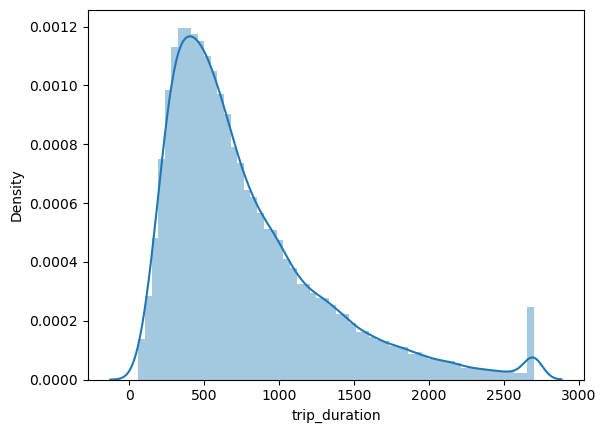

In [13]:
sns.distplot(citibike_1['trip_duration'], bins=60) # Shows extreme values

In [14]:
# Define specific columns
data_types = {
    'ride_start_date': 'datetime64'
}

In [15]:
file_path = os.path.join(path, '02 Data' , 'prepared data' , 'citibike_3.csv')

In [16]:
parse_dates = ['ride_start_date']

In [17]:
citibike_1 = pd.read_csv(file_path, parse_dates=parse_dates)

In [18]:
# How many rides per hour
hour_counts = citibike_1.groupby(['start_hour',citibike_1['ride_start_date'].dt.date])['ride_start_date'].count()

In [19]:
hour_counts

start_hour  ride_start_date
0           2013-09-01         15
            2013-09-02         15
            2013-09-03          5
            2013-09-04          9
            2013-09-05         13
                               ..
23          2013-09-26         38
            2013-09-27         44
            2013-09-28         48
            2013-09-29         21
            2013-09-30         17
Name: ride_start_date, Length: 711, dtype: int64

In [20]:
# average rides per hour
avg_rides_per_hour = hour_counts.groupby('start_hour').mean().reset_index()

In [21]:
avg_rides_per_hour

,start_hour,ride_start_date
0,0,14.000000
1,1,8.866667
2,2,5.586207
3,3,3.692308
4,4,2.777778
5,5,6.724138
6,6,29.633333
7,7,66.000000
8,8,104.233333
9,9,86.600000


In [22]:
# rides per day 
day_counts = citibike.groupby('day_of_the_week')['ride_start_date'].count()

In [23]:
day_counts

day_of_the_week
Fri    6594
Mon    6797
Sat    4965
Sun    5506
Thu    6212
Tue    6429
Wed    6490
Name: ride_start_date, dtype: int64

In [24]:
# how many rides per hour for each day of the week 
day_hour_counts = citibike_1.groupby([ 'day_of_the_week','start_hour'])['ride_start_date'].count()

In [25]:
day_hour_counts

day_of_the_week  start_hour
Fri              0              48
                 1              36
                 2              23
                 3              10
                 4              10
                              ... 
Wed              19            479
                 20            297
                 21            213
                 22            188
                 23            103
Name: ride_start_date, Length: 168, dtype: int64

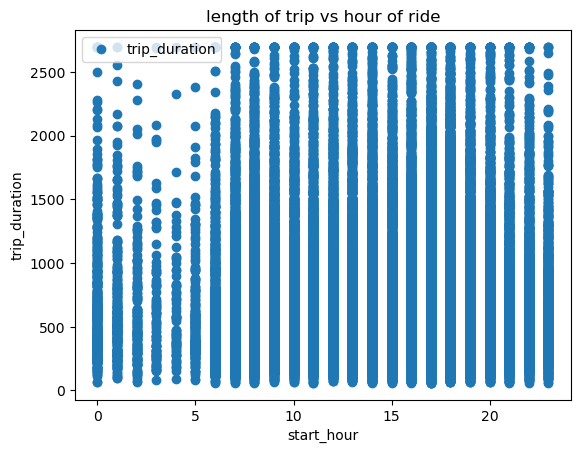

In [26]:
# Create a scatterplot using matplotlib.
citibike_1.plot(x = 'start_hour', y='trip_duration',style='o')
plt.title('length of trip vs hour of ride')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()

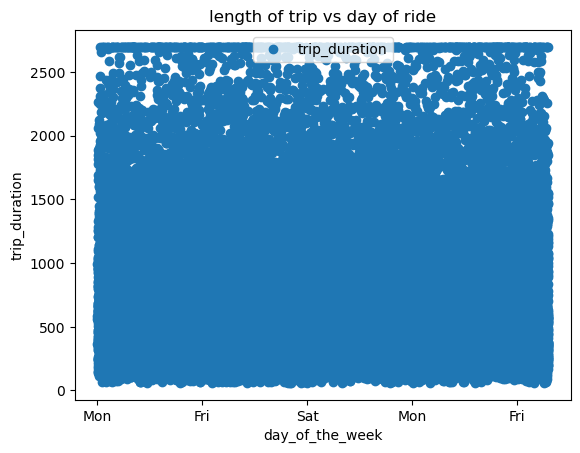

In [27]:
# Create a scatterplot using matplotlib.
citibike_1.plot(x = 'day_of_the_week', y='trip_duration',style='o') 
plt.title('length of trip vs day of ride')  
plt.xlabel('day_of_the_week')  
plt.ylabel('trip_duration')  
plt.show()

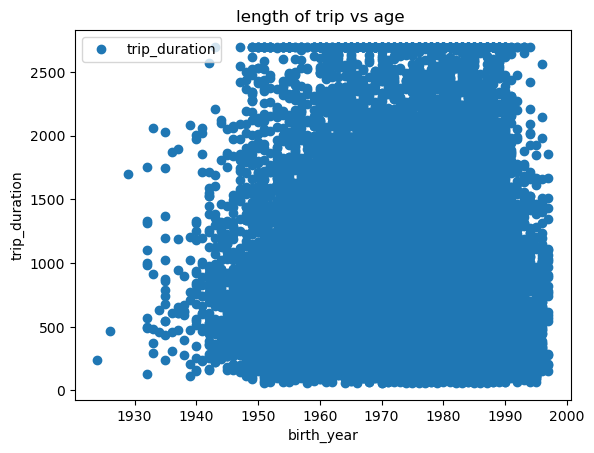

In [28]:
# Create a scatterplot using matplotlib.
citibike_1.plot(x = 'birth_year', y='trip_duration',style='o') 
plt.title('length of trip vs age ')  
plt.xlabel('birth_year')  
plt.ylabel('trip_duration')  
plt.show()

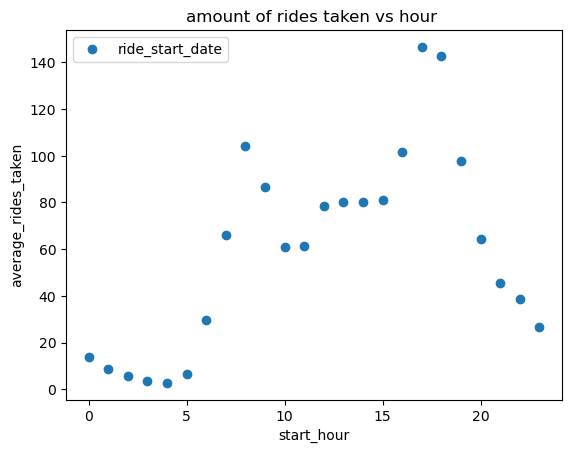

In [29]:
# Create a scatterplot using matplotlib.
avg_rides_per_hour.plot(x = 'start_hour', y='ride_start_date',style='o') 
plt.title('amount of rides taken vs hour ')  
plt.xlabel('start_hour')  
plt.ylabel('average_rides_taken')  
plt.show()

In [30]:
avg_rides_per_hour

,start_hour,ride_start_date
0,0,14.000000
1,1,8.866667
2,2,5.586207
3,3,3.692308
4,4,2.777778
5,5,6.724138
6,6,29.633333
7,7,66.000000
8,8,104.233333
9,9,86.600000


In [31]:
citibike_1.columns

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0',
       'day_of_the_week', 'start_hour', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_of_ride', 'end_of_ride',
       'trip category', 'ride_start_date', 'ride_start_time'],
      dtype='object')

In [32]:
ride_counts = pd.get_dummies(citibike_1, columns=['day_of_the_week', 'start_hour'], drop_first=True)

In [33]:
ride_counts

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,start_hour_14,start_hour_15,start_hour_16,start_hour_17,start_hour_18,start_hour_19,start_hour_20,start_hour_21,start_hour_22,start_hour_23
0,0,0,0,0,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,...,0,0,0,0,1,0,0,0,0,0
1,1,1,1,1,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,...,0,0,0,0,1,0,0,0,0,0
2,2,2,2,2,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,...,0,0,0,0,0,1,0,0,0,0
3,3,3,3,3,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,5,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42988,42988,42988,42988,49992,435,W 21 St & 6 Ave,40.741740,-73.994156,448,W 37 St & 10 Ave,...,0,1,0,0,0,0,0,0,0,0
42989,42989,42989,42989,49994,224,Spruce St & Nassau St,40.711464,-74.005524,301,E 2 St & Avenue B,...,0,0,1,0,0,0,0,0,0,0
42990,42990,42990,42990,49996,261,Johnson St & Gold St,40.694749,-73.983625,151,Cleveland Pl & Spring St,...,0,0,0,1,0,0,0,0,0,0
42991,42991,42991,42991,49997,402,Broadway & E 22 St,40.740343,-73.989551,524,W 43 St & 6 Ave,...,0,0,0,0,1,0,0,0,0,0


In [34]:
ride_counts.columns

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_of_ride', 'end_of_ride',
       'trip category', 'ride_start_date', 'ride_start_time',
       'day_of_the_week_Mon', 'day_of_the_week_Sat', 'day_of_the_week_Sun',
       'day_of_the_week_Thu', 'day_of_the_week_Tue', 'day_of_the_week_Wed',
       'start_hour_1', 'start_hour_2', 'start_hour_3', 'start_hour_4',
       'start_hour_5', 'start_hour_6', 'start_hour_7', 'start_hour_8',
       'start_hour_9', 'start_hour_10', 'start_hour_11', 'start_hour_12',
       'start_hour_13', 'start_hour_14', 'start_hour_15', 'start_hour_16',
       'start_hour_17', 'start_hour_18', 'start_hour_19', 'start_hour_20',
       'start_hour_21', 'start_hour_22', 'start_hour_2

In [35]:
# rides by hour count
rides_per_hour_count = hour_counts.groupby('start_hour').count().reset_index()

In [36]:
# How many rides per hour of each day
hour_counts_1 = citibike_1.groupby('start_hour')['ride_start_date'].count()

In [37]:
hour_counts_1

start_hour
0      420
1      266
2      162
3       96
4       75
5      195
6      889
7     1980
8     3127
9     2598
10    1827
11    1841
12    2353
13    2408
14    2401
15    2436
16    3046
17    4398
18    4280
19    2930
20    1932
21    1371
22    1159
23     803
Name: ride_start_date, dtype: int64

In [38]:
# riders per hour and trip duration
hourly_aggregated = citibike_1.groupby('start_hour').agg({'ride_start_date': 'count','trip_duration': 'mean'}).reset_index()

In [39]:
hourly_aggregated

,start_hour,ride_start_date,trip_duration
0,0,420,748.716667
1,1,266,702.657895
2,2,162,659.561728
3,3,96,687.020833
4,4,75,667.106667
5,5,195,605.348718
6,6,889,648.613048
7,7,1980,727.038384
8,8,3127,756.595459
9,9,2598,728.346035


In [40]:
#change column names
hourly_aggregated.rename(columns={'ride_start_date': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

In [41]:
hourly_aggregated

,start_hour,ride_count,avg_trip_duration
0,0,420,748.716667
1,1,266,702.657895
2,2,162,659.561728
3,3,96,687.020833
4,4,75,667.106667
5,5,195,605.348718
6,6,889,648.613048
7,7,1980,727.038384
8,8,3127,756.595459
9,9,2598,728.346035


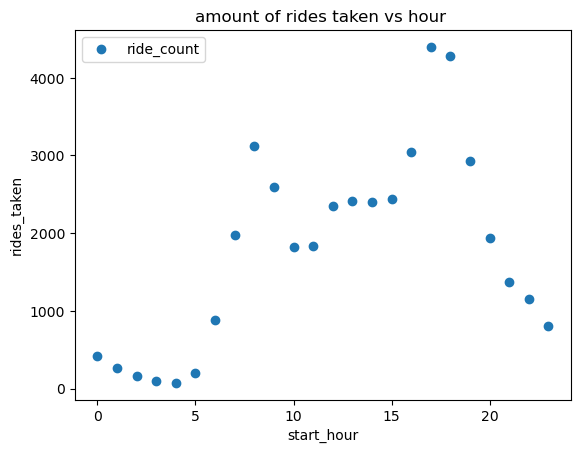

In [42]:
#Amount of riders by hour
hourly_aggregated.plot(x = 'start_hour', y='ride_count',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('amount of rides taken vs hour ')  
plt.xlabel('start_hour')  
plt.ylabel('rides_taken')  
plt.show()

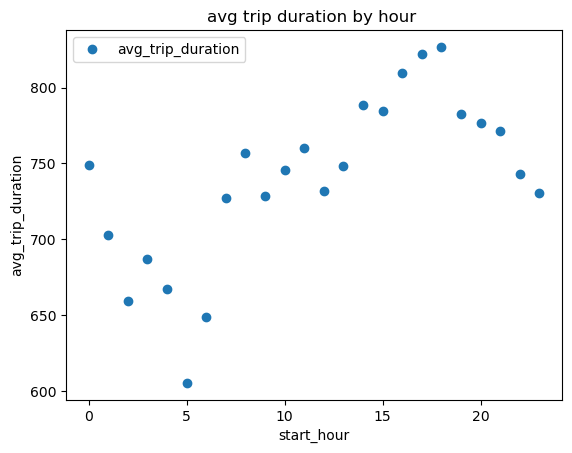

In [43]:
# plot for trip duration and by hour
hourly_aggregated.plot(x = 'start_hour', y='avg_trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('avg trip duration by hour ')  
plt.xlabel('start_hour')  
plt.ylabel('avg_trip_duration')  
plt.show()

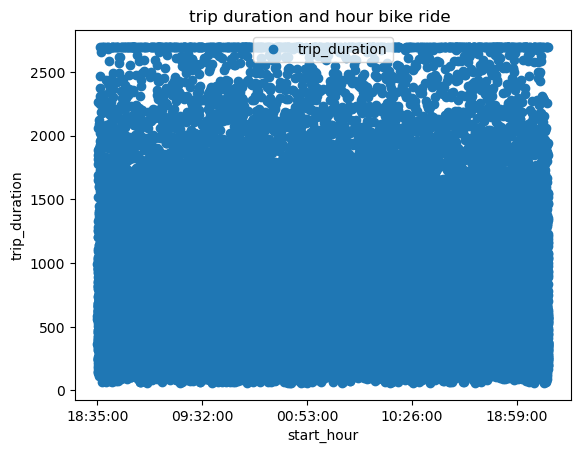

In [44]:
# plot for trip duration and hour 
citibike_1.plot(x = 'ride_start_time', y='trip_duration',style='o') 
plt.title('trip duration and hour bike ride ')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()

In [45]:
citibike_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0.3             42993 non-null  int64         
 1   Unnamed: 0.2             42993 non-null  int64         
 2   Unnamed: 0.1             42993 non-null  int64         
 3   Unnamed: 0               42993 non-null  int64         
 4   day_of_the_week          42993 non-null  object        
 5   start_hour               42993 non-null  int64         
 6   start_station_id         42993 non-null  int64         
 7   start_station_name       42993 non-null  object        
 8   start_station_latitude   42993 non-null  float64       
 9   start_station_longitude  42993 non-null  float64       
 10  end_station_id           42993 non-null  int64         
 11  end_station_name         42993 non-null  object        
 12  end_station_latitude     42993 n

In [46]:
# Define data for specific columns
data_types = {'ride_start_time': 'datetime64'}

In [47]:
file_path_1 = os.path.join(path, '02 Data','prepared data','citibike_3.csv')

In [48]:
parse_dates = ['ride_start_time']

In [49]:
citi_1 = pd.read_csv(file_path_1, parse_dates=parse_dates)

In [50]:
citi_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0.3             42993 non-null  int64         
 1   Unnamed: 0.2             42993 non-null  int64         
 2   Unnamed: 0.1             42993 non-null  int64         
 3   Unnamed: 0               42993 non-null  int64         
 4   day_of_the_week          42993 non-null  object        
 5   start_hour               42993 non-null  int64         
 6   start_station_id         42993 non-null  int64         
 7   start_station_name       42993 non-null  object        
 8   start_station_latitude   42993 non-null  float64       
 9   start_station_longitude  42993 non-null  float64       
 10  end_station_id           42993 non-null  int64         
 11  end_station_name         42993 non-null  object        
 12  end_station_latitude     42993 n

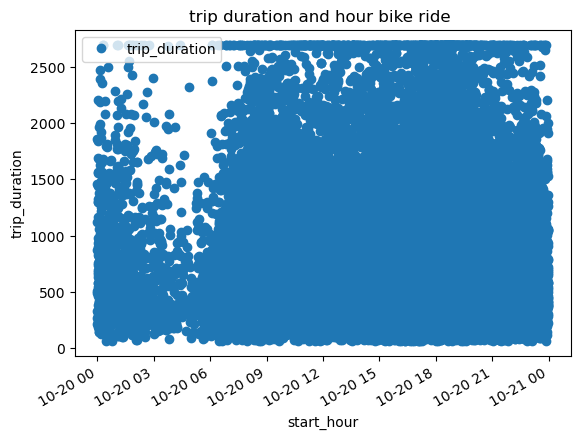

In [51]:
citi_1.plot(x = 'ride_start_time', y='trip_duration',style='o') 
plt.title('trip duration and hour bike ride ')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()

In [52]:
# rides by hour, ride count and avg trip duration
hourly_aggregated = citi_1.groupby('start_hour').agg({'ride_start_date': 'count', 'trip_duration': 'mean'}).reset_index()

In [53]:
hourly_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_hour       24 non-null     int64  
 1   ride_start_date  24 non-null     int64  
 2   trip_duration    24 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 708.0 bytes


In [54]:
# making columns 
hourly_aggregated.rename(columns={'ride_start_date': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

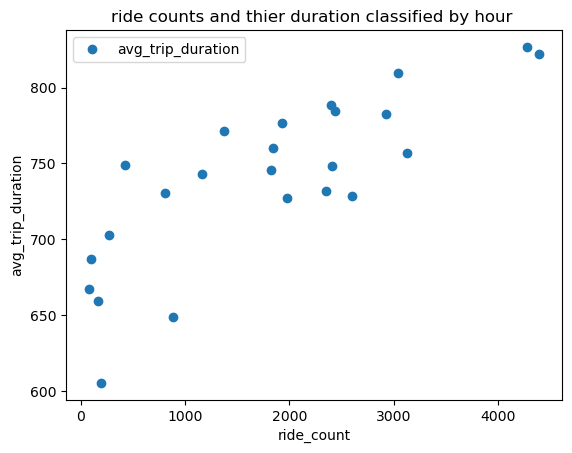

In [55]:
#avg trip duration and ride count
hourly_aggregated.plot(x = 'ride_count', y='avg_trip_duration',style='o') 
plt.title('ride counts and thier duration classified by hour ')  
plt.xlabel('ride_count')  
plt.ylabel('avg_trip_duration')  
plt.show()

In [56]:
q1=hourly_aggregated['ride_count'].quantile(0.25)#first Quartile
q3=hourly_aggregated['ride_count'].quantile(0.75)#third Quartile
iqr = q3-q1

In [57]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [58]:
outliers = hourly_aggregated[(hourly_aggregated['ride_count'] < lower_bound) | (hourly_aggregated['ride_count'] > upper_bound)]

In [59]:
outliers

,start_hour,ride_count,avg_trip_duration


In [60]:
q1=hourly_aggregated['avg_trip_duration'].quantile(0.25)#first Quartile
q3=hourly_aggregated['avg_trip_duration'].quantile(0.75)#third Quartile
iqr = q3-q1

In [61]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [62]:
outliers_1 = hourly_aggregated[(hourly_aggregated['avg_trip_duration'] < lower_bound) | (hourly_aggregated['avg_trip_duration'] > upper_bound)]

In [63]:
# Known outliers!
outliers_1

,start_hour,ride_count,avg_trip_duration
5,5,195,605.348718


In [64]:
#finding outliers 
q1=citi_1['trip_duration'].quantile(0.25)#first Quartile
q3=citi_1['trip_duration'].quantile(0.75)#third Quartile
iqr = q3-q1

In [65]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [66]:
outliers_2 = citi_1[(citi_1['trip_duration'] < lower_bound) | (citi_1['trip_duration'] > upper_bound)]

In [67]:
outliers_2

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,day_of_the_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,...,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride,trip category,ride_start_date,ride_start_time
27,27,27,27,31,Thu,16,471,Grand St & Havemeyer St,40.712868,-73.956981,...,-74.002950,2057,Subscriber,1954.0,1,2013-09-19 16:35:00,2013-09-19 17:09:00,over 20 minutes,2013-09-19,2023-10-20 17:09:00
55,55,55,55,63,Wed,17,469,Broadway & W 53 St,40.763441,-73.982681,...,-73.967510,2262,Subscriber,1979.0,2,2013-09-11 17:11:00,2013-09-11 17:49:00,over 20 minutes,2013-09-11,2023-10-20 17:49:00
179,179,179,179,208,Mon,14,342,Columbia St & Rivington St,40.717400,-73.980166,...,-73.980166,2093,Subscriber,1960.0,2,2013-09-09 14:38:00,2013-09-09 15:13:00,over 20 minutes,2013-09-09,2023-10-20 15:13:00
183,183,183,183,212,Tue,10,391,Clark St & Henry St,40.697601,-73.993446,...,-73.988557,2124,Subscriber,1957.0,1,2013-09-24 10:32:00,2013-09-24 11:08:00,over 20 minutes,2013-09-24,2023-10-20 11:08:00
197,197,197,197,231,Thu,17,2006,Central Park S & 6 Ave,40.765909,-73.976342,...,-73.976342,2251,Subscriber,1963.0,1,2013-09-05 17:31:00,2013-09-05 18:09:00,over 20 minutes,2013-09-05,2023-10-20 18:09:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42837,42837,42837,42837,49809,Sun,18,448,W 37 St & 10 Ave,40.756604,-73.997901,...,-74.002777,2697,Subscriber,1990.0,2,2013-09-08 18:32:00,2013-09-08 19:22:00,over 20 minutes,2013-09-08,2023-10-20 19:22:00
42902,42902,42902,42902,49886,Tue,7,278,Concord St & Bridge St,40.697666,-73.984764,...,-73.977225,2252,Subscriber,1976.0,2,2013-09-10 07:47:00,2013-09-10 08:24:00,over 20 minutes,2013-09-10,2023-10-20 08:24:00
42903,42903,42903,42903,49887,Sun,16,242,Flushing Ave & Carlton Ave,40.697883,-73.973503,...,-73.984907,2697,Subscriber,1965.0,1,2013-09-22 16:10:00,2013-09-22 17:25:00,over 20 minutes,2013-09-22,2023-10-20 17:25:00
42909,42909,42909,42909,49893,Mon,16,493,W 45 St & 6 Ave,40.756800,-73.982912,...,-73.971212,2697,Subscriber,1968.0,1,2013-09-09 16:13:00,2013-09-09 17:13:00,over 20 minutes,2013-09-09,2023-10-20 17:13:00


In [68]:
#removing outliers
filtered_citi = citi_1[(citi_1['trip_duration'] >= lower_bound) & (citi_1['trip_duration'] <= upper_bound)]

# Testing for other variables

In [69]:
# day of week and ride count
day_counts = citi_1.groupby('day_of_the_week')['ride_start_date'].count().reset_index()

In [70]:
day_counts

,day_of_the_week,ride_start_date
0,Fri,6594
1,Mon,6797
2,Sat,4965
3,Sun,5506
4,Thu,6212
5,Tue,6429
6,Wed,6490


In [71]:
# day of week ride and avg trip duration
daily_aggregated = citi_1.groupby('day_of_the_week').agg({'ride_start_date': 'count', 'trip_duration': 'mean'}).reset_index()

In [72]:
daily_aggregated

,day_of_the_week,ride_start_date,trip_duration
0,Fri,6594,764.061723
1,Mon,6797,761.585552
2,Sat,4965,804.035045
3,Sun,5506,814.107701
4,Thu,6212,750.656632
5,Tue,6429,749.886452
6,Wed,6490,763.153621


less riders on weekend but longer rider

In [73]:
#changing column names
daily_aggregated.rename(columns={'ride_start_date': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

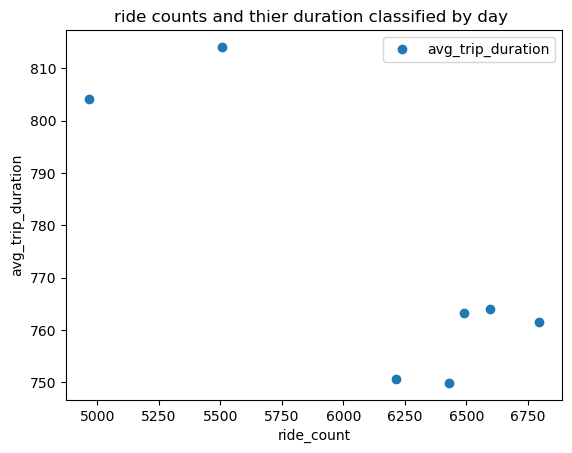

In [74]:
# ride counts and avg trip duration by day
daily_aggregated.plot(x = 'ride_count', y='avg_trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('ride counts and thier duration classified by day ')  
plt.xlabel('ride_count')  
plt.ylabel('avg_trip_duration')  
plt.show()

# 6. Reshape the variables into NumPy arrays and put them into separate objects.

In [75]:
X = hourly_aggregated['ride_count'].values.reshape(-1,1)
y = hourly_aggregated['avg_trip_duration'].values.reshape(-1,1)

In [76]:
X

array([[ 420],
       [ 266],
       [ 162],
       [  96],
       [  75],
       [ 195],
       [ 889],
       [1980],
       [3127],
       [2598],
       [1827],
       [1841],
       [2353],
       [2408],
       [2401],
       [2436],
       [3046],
       [4398],
       [4280],
       [2930],
       [1932],
       [1371],
       [1159],
       [ 803]], dtype=int64)

In [77]:
y

array([[748.71666667],
       [702.65789474],
       [659.5617284 ],
       [687.02083333],
       [667.10666667],
       [605.34871795],
       [648.61304837],
       [727.03838384],
       [756.59545891],
       [728.34603541],
       [745.68472906],
       [760.06518197],
       [732.08372291],
       [748.19684385],
       [788.49979175],
       [784.35057471],
       [809.88345371],
       [822.30832196],
       [826.91121495],
       [782.3105802 ],
       [776.41252588],
       [771.61050328],
       [742.78947368],
       [730.1992528 ]])

# 7.Split the data into two sets: a training set and a test set.

In [78]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [79]:
# Create a regression object.
regression = LinearRegression() 

In [80]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

# 8. Run a linear regression on the data.

In [81]:
# running the regression again with a filtered DF
hourly_aggregated_filtered = filtered_citi.groupby('start_hour').agg({'ride_start_date': 'count', 'trip_duration': 'mean'}).reset_index()

In [82]:
hourly_aggregated_filtered

,start_hour,ride_start_date,trip_duration
0,0,403,677.868486
1,1,257,647.210117
2,2,158,620.936709
3,3,90,584.422222
4,4,73,616.589041
5,5,191,570.586387
6,6,863,598.979143
7,7,1908,668.484277
8,8,3023,705.284155
9,9,2504,668.774760


In [83]:
#rename columns
hourly_aggregated_filtered.rename(columns={'ride_start_date': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

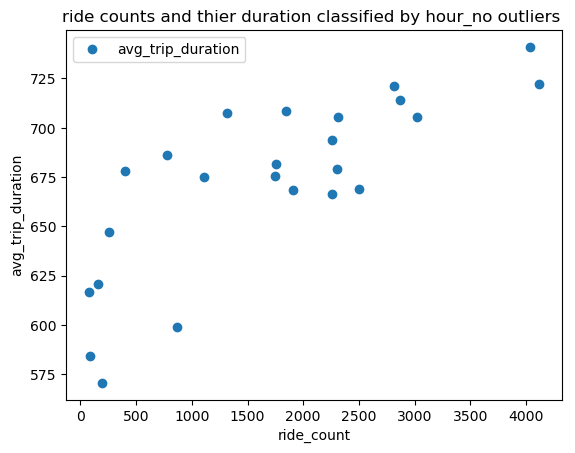

In [84]:
#plot with DF set with no outliers
hourly_aggregated_filtered.plot(x = 'ride_count', y='avg_trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('ride counts and thier duration classified by hour_no outliers ')  
plt.xlabel('ride_count')  
plt.ylabel('avg_trip_duration')  
plt.show()

In [85]:
#reshaping values
X_1 = hourly_aggregated_filtered['ride_count'].values.reshape(-1,1)
y_1 = hourly_aggregated_filtered['avg_trip_duration'].values.reshape(-1,1)

In [86]:
# Split data into a training set and a test set.
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=42)

In [87]:
# Create a regression object.
regression = LinearRegression() 

In [88]:
# Fit the regression object onto the training set.
regression.fit(X_1_train, y_1_train)

LinearRegression()

In [89]:
# Predict the values of y using X. applying model just to X test
y_1_predicted = regression.predict(X_1_test)

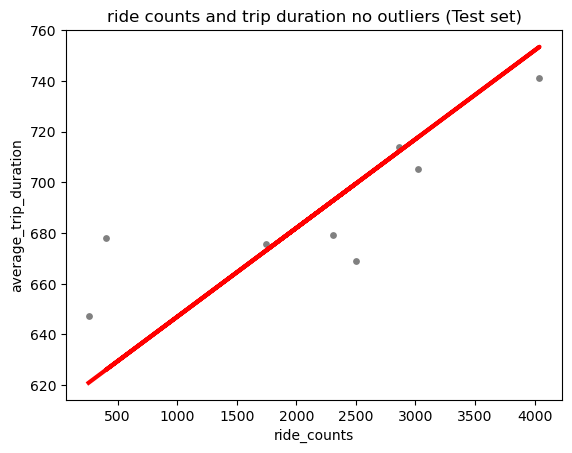

In [90]:
# Create a plot that shows the regression line from the model on the test set.
plot_test_1 = plt
plot_test_1.scatter(X_1_test, y_1_test, color='gray', s = 15)
plot_test_1.plot(X_1_test, y_1_predicted, color='red', linewidth =3)
plot_test_1.title('ride counts and trip duration no outliers (Test set)')
plot_test_1.xlabel('ride_counts')
plot_test_1.ylabel('average_trip_duration')
plot_test_1.show()

# We can see a positive flow on the chart so we can be sure the information was correct since both checks are showing the same plots.
# I would perfer for the plot to be closer to the slope to show a stronger correlation of the data.



# 11. Check the model performance statistics—MSE and R2 score.


In [97]:
# Create objects that contain the model summary statistics.
rmse = meansquared_error(y_1_test, y_1_predicted) 
r2 = r2_score(y_1_test, y_1_predicted)

NameError: name 'meansquared_error' is not defined

In [98]:
# Model summary statistics. 
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03503481]]
Mean squared error:  604.4295810846346
R2 score:  0.21346354916799082


# 12. Compare the predicted y values with the actual y values in a dataframe.

In [ ]:
# Comparing the actual and predicted values of y.

data_1 = pd.DataFrame({'Actual': y_1_test.flatten(), 'Predicted': y_1_predicted.flatten()})

# There is no signifigant difference when outliers were removed


In [ ]:
hourly_aggregated_filtered.head()

In [ ]:
citi_1.head()

In [ ]:
citi_clean=citi_1[['day_of_the_week','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_of_ride', 'end_of_ride',
       'trip category', 'ride_start_date', 'ride_start_time']]

In [ ]:
hourly_aggregated_filtered.head()

In [ ]:
#change trip duration from seconds to minutes
hourly_aggregated_filtered['avg_trip_duration_min']=hourly_aggregated_filtered['avg_trip_duration']/60

In [ ]:
hourly_aggregated_filtered

In [ ]:
#plot with no outliers
hourly_aggregated_filtered.plot(x = 'avg_trip_duration_min', y='ride_count',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('ride counts and thier duration classified by hour_no outliers ')  
plt.xlabel('avg_trip_duration_minutes')  
plt.ylabel('ride_count')  
plt.show()

In [ ]:
X_1 = hourly_aggregated_filtered['avg_trip_duration_min'].values.reshape(-1,1)
y_1 = hourly_aggregated_filtered['ride_count'].values.reshape(-1,1)

In [ ]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_1_predicted = regression.predict(X_1_test)

In [ ]:
# Create a plot that shows the regression line from the model on the test set.

plot_test_1 = plt
plot_test_1.scatter(X_1_test, y_1_test, color='gray', s = 15)
plot_test_1.plot(X_1_test, y_1_predicted, color='red', linewidth =3)
plot_test_1.title('ride counts and trip duration no outliers (Test set)')
plot_test_1.xlabel('avg_trip_duration_min')
plot_test_1.ylabel('ride_counts')
plot_test_1.show()

In [95]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_1_test, y_1_predicted) # This is the mean squared error
r2 = r2_score(y_1_test, y_1_predicted) # This is the R2 score. 

In [96]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03503481]]
Mean squared error:  604.4295810846346
R2 score:  0.21346354916799082


In [ ]:
ride_counts.head()

In [ ]:
X=hourly_aggregated_filtered[['start_hour','avg_trip_duration']]

In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(X)

In [ ]:
y = hourly_aggregated_filtered['ride_count']

In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
#model regression summary
print(model.summary())

In [ ]:
# Define the predictor variable (start_hour) and dependent variables (count and avg_trip_duration)
X = hourly_aggregated_filtered['start_hour']
y_count = hourly_aggregated_filtered['ride_count']
y_avg_duration = hourly_aggregated_filtered['avg_trip_duration']


In [ ]:
X = sm.add_constant(X)

In [ ]:
model_count = sm.OLS(y_count, X).fit()

In [ ]:
model_avg_duration = sm.OLS(y_avg_duration, X).fit()

In [ ]:
print("Model for Count of Rides:")
print(model_count.summary())
print("\nModel for Average Trip Duration:")
print(model_avg_duration.summary())

In [ ]:
X = hourly_aggregated_filtered[['avg_trip_duration', 'start_hour']]
X = sm.add_constant(X)

In [ ]:
y = hourly_aggregated_filtered['ride_count']

In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
print(model.summary())

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='avg_trip_duration', y='ride_count', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='avg_trip_duration')
sns.regplot(x='start_hour', y='ride_count', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='start_hour')
plt.title('Ride Counts vs. Predictors')
plt.xlabel('Predictor Variables')
plt.ylabel('Ride Count')
plt.legend()
plt.show()

In [ ]:
X = hourly_aggregated_filtered[['ride_count', 'start_hour']]
X = sm.add_constant(X)

In [ ]:
y = hourly_aggregated_filtered['avg_trip_duration']

In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
print(model.summary())

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='ride_count', y='avg_trip_duration', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='avg_trip_duration')
sns.regplot(x='start_hour', y='avg_trip_duration', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='start_hour')
plt.title('avg_trip_duration vs. Predictors')
plt.xlabel('Predictor Variables')
plt.ylabel('avg_trip_duration')
plt.legend()
plt.show()

In [ ]:
# Reshape the variables into NumPy arrays
X_avg_trip_duration = hourly_aggregated_filtered['ride_count'].values
y_avg_trip_duration = hourly_aggregated_filtered['avg_trip_duration'].values

X_start_hour = hourly_aggregated_filtered['start_hour'].values
y_avg_trip_duration = hourly_aggregated_filtered['avg_trip_duration'].values


In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=X_avg_trip_duration, y=y_avg_trip_duration, scatter_kws={'s': 50}, label='avg_trip_duration')
sns.regplot(x=X_start_hour, y=y_avg_trip_duration, scatter_kws={'s': 50}, label='start_hour')
plt.title('avg_trip_duration vs. Predictors')
plt.xlabel('Predictor Variables')
plt.ylabel('avg_trip_duration')
plt.legend()
plt.show()

In [ ]:
X = hourly_aggregated_filtered[['ride_count', 'start_hour']]  
y = hourly_aggregated_filtered['avg_trip_duration']  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

In [ ]:
# Create a regression object.

regression = LinearRegression() 

In [ ]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

In [ ]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_predicted = regression.predict(X_test)

In [ ]:
# Define the predictor variables (X) and the target variable (y)
X = hourly_aggregated_filtered[['ride_count', 'start_hour']]  
y = hourly_aggregated_filtered['avg_trip_duration']  

# Make sure X and y have the same number of data points
assert len(X) == len(y), "X and y must have the same number of data points"

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

In [ ]:
y

In [ ]:
X

In [ ]:
citi_1.head()

In [ ]:
citi_1_clean=citi_1[['day_of_the_week','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_of_ride', 'end_of_ride',
       'trip category', 'ride_start_date', 'ride_start_time']]


In [ ]:
citi_1_clean

In [ ]:
filtered_citi.head()

In [ ]:
citi_1_clean=filtered_citi[['day_of_the_week','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_of_ride', 'end_of_ride',
       'trip category', 'ride_start_date', 'ride_start_time']]

In [ ]:
# saving to csv
citi_1_clean.to_csv(os.path.join(path, '02 Data','prepared data', 'citi_5.csv'))

# I wish the models wouldv'e of turned out better. There is not a much of a relationship between the data as I was hoping. 

# There is a possiblity of bias in information collected. If people are filling in this info for each ride it could be people are not doing so correctly. Also if it is filled by a app and tracked by they phone and phone position there could be certain outages that have created lapse in the data. 